In [26]:
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt
import numpy as np

# Local imports
from Modules import JAW


load_dotenv()


True

In [22]:
data_path = os.getenv("SISSE_7390")

data = JAW.read_text_file(data_path)

print(data.info())

print(min(data.thickness_nm), max(data.thickness_nm))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7390 entries, 0 to 7389
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   n_points                7390 non-null   int64  
 1   z_align                 7390 non-null   float64
 2   sig_int                 7390 non-null   float64
 3   tilt_x                  7390 non-null   float64
 4   tilt_y                  7390 non-null   float64
 5   hardware_ok             7390 non-null   float64
 6   mse                     7349 non-null   float64
 7   thickness_nm            7349 non-null   float64
 8   n of Si_JAW @ 632.8 nm  7349 non-null   float64
 9   fit_ok                  7349 non-null   float64
 10  x                       7390 non-null   float64
 11  y                       7390 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 692.9 KB
None
4.02 18.97


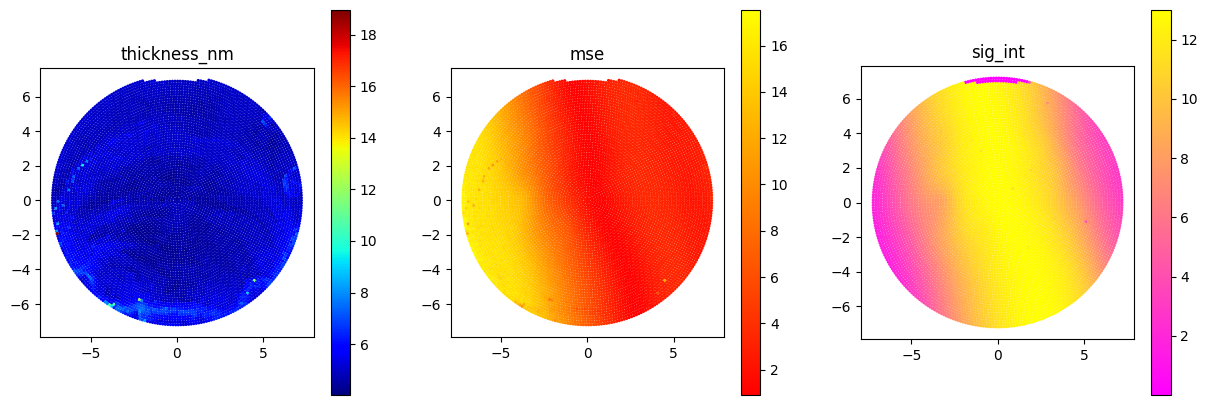

In [25]:
parameters = {
    "thickness_nm": "jet",
    "mse": "autumn", 
    "sig_int": "spring",
}

fig, ax = plt.subplots(nrows=1, ncols=len(parameters), figsize=(len(parameters)*5, 5))

for p, a in zip(parameters, ax):
    sc = a.scatter(data.x, data.y, c=data[p], s=1.75, cmap=parameters[p])
    fig.colorbar(sc, orientation='vertical')
    a.set_aspect("equal")
    a.set_title(p)

plt.show()

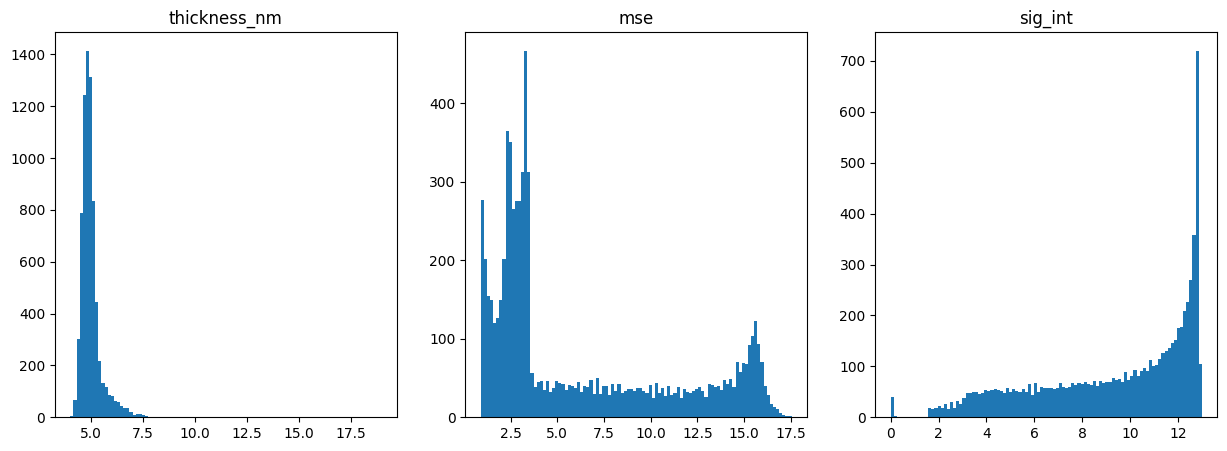

In [44]:
n = 250

fig, ax = plt.subplots(nrows=1, ncols=len(parameters), figsize=(len(parameters)*5, 5))

for p, a in zip(parameters, ax):
    a.hist(data[p], bins=100)
    a.set_title(p)

plt.show()